# Verify merge 

In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import time

import sys
sys.path.append('../../Multimodal_freight_USA/')

from mfreight.Multimodal.merge_graphs import MergeNets
from mfreight.Multimodal.graph_utils import MultimodalNet
from mfreight.utils import folium_revisited

In [2]:
total = MergeNets()

In [3]:
start = time.time()
total.merge_networks(import_preprocesses_graphs = True, path_u= "/data/multimodal_G_tot_u.plk", path= "/data/multimodal_G_tot.plk")
print(f'Elapsed time: {time.time()-start}')

Elapsed time: 79.0155656337738


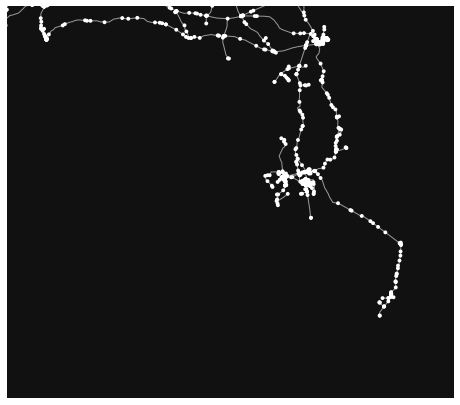

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
ox.plot_graph(total.G_rail, bbox=(31, 24, -79, -88))

In [5]:
len(total.G_multimodal_u)

90446

In [18]:
j=0
for i in range(4):
    j+=1
j

4

In [45]:
import pandas as pd
a = pd.DataFrame({'one':[1,2,3],'two':[2,3,4]})
a.loc[2,'three'] = 12
g = a.loc[1,'three']

In [5]:
import geopandas as gpd
nodes = gpd.GeoDataFrame(
    {
        "x": [1, 2, 3, 4, 5, 6, 7],
        "y": [2, 3, 4, 5, 6, 7, 8],
        "key": [0, 0, 0, 0, 0, 0, 0],
        "geometry": [1, 2, 3, 4, 5, 6, 7],
    },
    crs="EPSG:4326",
)
edges = gpd.GeoDataFrame(
    {
        "trans_mode": ["rail", "rail", "rail", "rail", "rail", "rail"],
        "length": [1, 1, 1, 1, 1, 1],
        "RROWNER1": ["CSXT", "AGR", "CSXT", "CN", "CN", "NS"],
        "RROWNER2": ["GFRR", "CSXT", "BAYL", np.nan, np.nan, np.nan],
        "TRKRGHTS1": ["NS", "CSXT", np.nan, np.nan, np.nan, np.nan],
        "u": [0, 1, 2, 2, 4, 5],
        "v": [1, 2, 3, 4, 5, 6],
        "key": [0, 0, 0, 0, 0, 0],
    },
    crs="EPSG:4326",
)

G = ox.graph_from_gdfs(nodes, edges)

<ipython-input-5-beb6d06d0472>:2: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  nodes = gpd.GeoDataFrame(
<ipython-input-5-beb6d06d0472>:11: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  edges = gpd.GeoDataFrame(


In [6]:
d = {"k":[1,2,3],"l":[1234,22,4]}

In [9]:
'k' in d.keys()

True

In [15]:
from shapely import wkt
df = pd.read_csv('rail_edges.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')

/Users/yann/.conda/envs/Multimodal_freight_USA/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (25,26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
gdf.columns

Index(['Unnamed: 0', 'STATUS', 'trans_mode', 'length', 'duration_h',
       'CO2_eq_kg', 'geometry', 'speed_kmh', 'STFIPS', 'RROWNER1', 'TRKRGHTS1',
       'TRKRGHTS2', 'TRKRGHTS3', 'PASSNGR', 'STRACNET', 'TRACKS', 'DIRECTION',
       'NET', 'TIMEZONE', 'TRKRGHTS11', 'TRKRGHTS10', 'RROWNER2', 'TRKRGHTS4',
       'TRKRGHTS5', 'TRKRGHTS6', 'TRKRGHTS7', 'TRKRGHTS8', 'TRKRGHTS12',
       'RROWNER3', 'TRKRGHTS9', 'u', 'v', 'key'],
      dtype='object')

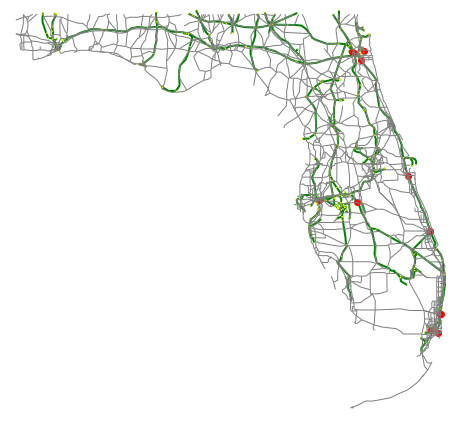

In [3]:
Net= MultimodalNet()
Net.plot_multimodal_graph()

In [4]:
hwy_dest = (25.382380, -80.475159)
hwy_ori =(30.439440, -85.057166)
df, count = MultimodalNet().get_route_detail((30.439440, -85.057166),(25.382380, -80.475159),'CO2_eq_kg')

In [5]:
node_orig,node_dest = 1000001567, 1000006518
shortest_path_nodes = nx.dijkstra_path(
    Net.G_multimodal_u, node_orig, node_dest, weight='length'
)
ox.plot_route_folium(Net.G_multimodal_u,
                                shortest_path_nodes,route_width=4,route_color="green")

In [6]:
Net = MultimodalNet()
Net.plot_route(hwy_dest,hwy_ori,folium=True)